# Real Estate Market Performance Analysis - Dubai (2023 vs 2024)

**Objectives**:
To analyze and compare Dubai’s real estate market performance between the years 2023 and 2024, focusing on price trends, listing volume, and regional pricing insights

**Dataset Source:**  
Dubai Real Estate Sales Insights - Kaggle  
https://www.kaggle.com/datasets/azharsaleem/dubai-real-estate-sales-insights

*Reason for Exclusion of 2021 and 2022 from the dataset*: Data for years 2021 and 2022 is limited (only 2 and 69 records respectively), with skewed outliers. These years are excluded to ensure data reliability.

**Key KPIs:**
- Average Property Price
- Price per SqFt
- Listings Trend Over Time
- Property Type Distribution
- Price by Location
- Completion Status vs Price

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Import the Dateset

In [2]:
df = pd.read_csv('data/dubai_real_estate_sales.csv')

# View some data from dataset to ensure proper import of the dataset
df.head() 

,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,...,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
0,1450000,Medium,Apartment,1,2,"The Bay, Business Bay, Dubai",Furnished,Ready,2024-04-15,0,...,0,0,0,0,Business Bay,Dubai,UAE,25.189427,55.264819,For Sale
1,6600000,High,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",Unfurnished,Ready,2024-04-15,0,...,0,0,0,0,DAMAC Hills,Dubai,UAE,25.028148,55.264246,For Sale
2,4825000,High,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",Unfurnished,Ready,2024-04-18,288929,...,510,56,1,11,Downtown Dubai,Dubai,UAE,25.186684,55.274705,For Sale
3,980000,Average,Apartment,3,3,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",Unfurnished,Ready,2024-01-03,73384,...,0,0,0,0,Al Reef,Abu Dhabi,UAE,24.466437,54.656891,For Sale
4,2499999,Medium,Townhouse,3,4,"Nima, The Valley, Dubai",Furnished,Off-Plan,2024-02-28,0,...,0,0,0,0,The Valley,Dubai,UAE,25.019221,55.447201,For Sale


## Data Cleaning & Transformation


### Check Basic Info

In [3]:
# Check Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41381 entries, 0 to 41380
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     41381 non-null  int64  
 1   price_category            41381 non-null  object 
 2   type                      41381 non-null  object 
 3   beds                      41381 non-null  int64  
 4   baths                     41381 non-null  int64  
 5   address                   41381 non-null  object 
 6   furnishing                41381 non-null  object 
 7   completion_status         41381 non-null  object 
 8   post_date                 41381 non-null  object 
 9   average_rent              41381 non-null  int64  
 10  building_name             41381 non-null  object 
 11  year_of_completion        41381 non-null  int64  
 12  total_parking_spaces      41381 non-null  int64  
 13  total_floors              41381 non-null  int64  
 14  total_

### Convert Date column

In [9]:
df['post_date'] = pd.to_datetime(df['post_date'], errors='coerce')

### Drop Rows with missing price or location data (essential for proper analysis)

In [67]:
# Selecting the columns where we want to drop the missing data from
df = df.dropna(subset=['price', 'city', 'Latitude', 'Longitude', 'type'])

### Drop Rows with City other than Dubai

In [68]:
df = df[df['city'] == 'Dubai']  

### Proper formatting for Price Column

In [69]:
df.loc[:, 'price'] = pd.to_numeric(df['price'], errors='coerce', downcast='integer')

### Create Month and Year Columns

In [70]:
# Ensure the post_date column is in datetime format before extracting year and month
df.loc[:, 'year'] = df['post_date'].dt.year
df.loc[:, 'month'] = df['post_date'].dt.month

### Filter the Dataset for the required years, i.e 2023 and 2024

In [71]:
df = df[df['year'].isin([2023, 2024])]

### Create Price/SqFT if area available

In [72]:
# Multiply Price x Area
df.loc[: ,'price_per_sqft'] = df['price'] / df['total_building_area_sqft']

# Remove incorrect data to NaN
df.loc[:, 'price_per_sqft'] = df['price_per_sqft'].replace([np.inf, -np.inf], np.nan)

## Exploratory Data Analysis (EDA)

### Average Price by year

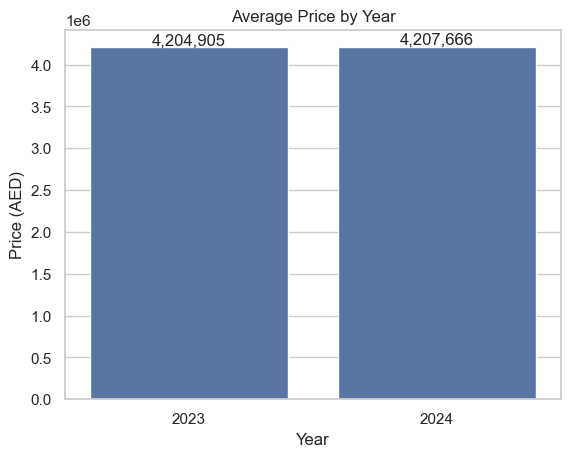

In [73]:
avg_price = df.groupby('year')['price'].mean().reset_index()

# Setting the Theme for the plots
sns.set(style="whitegrid")

# Create a function to format numbers with commas and no decimals
def format_price(x):
    return f"{int(x):,}"

# Create the formatted labels beforehand
formatted_prices = [format_price(price) for price in avg_price['price']]

ax = sns.barplot(data=avg_price, x='year', y='price')
ax.bar_label(ax.containers[0], labels=formatted_prices)
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Price (AED)")
plt.show()

### Listings Volume by Year

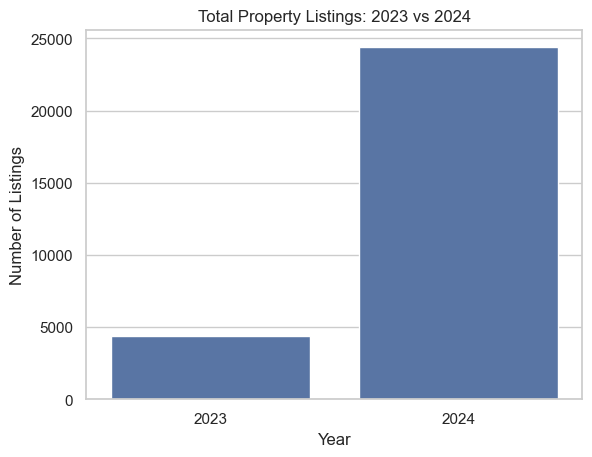

In [74]:
listings_by_year = df.groupby('year').size().reset_index(name='count')

sns.barplot(data=listings_by_year, x='year', y='count')
plt.title("Total Property Listings: 2023 vs 2024")
plt.ylabel("Number of Listings")
plt.xlabel("Year")
plt.show()

### Top 10 Areas by Avg Price (Per Year)

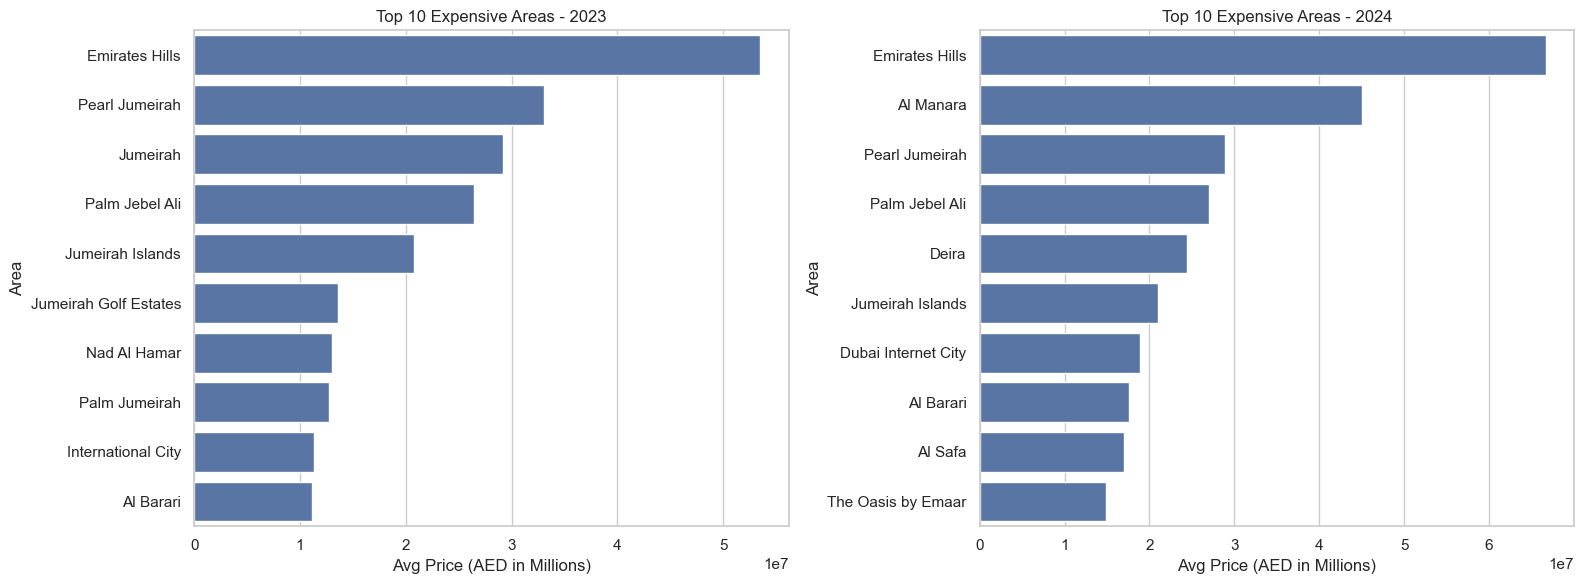

In [75]:
top_areas = df.groupby(['year', 'area_name'])['price'].mean().reset_index()
top_areas = top_areas.sort_values(['year', 'price'], ascending=[True, False])

# Pick top 10 areas for each year
top_2023 = top_areas[top_areas['year'] == 2023].head(10)
top_2024 = top_areas[top_areas['year'] == 2024].head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_2023, x='price', y='area_name', ax=axes[0])
axes[0].set_title("Top 10 Expensive Areas - 2023")
axes[0].set_xlabel("Avg Price (AED in Millions)")
axes[0].set_ylabel("Area")

sns.barplot(data=top_2024, x='price', y='area_name', ax=axes[1])
axes[1].set_title("Top 10 Expensive Areas - 2024")
axes[1].set_xlabel("Avg Price (AED in Millions)")
axes[1].set_ylabel("Area")


plt.tight_layout()
plt.show()


### Property Type Share Comparison

C:\Users\adnan\AppData\Local\Temp\ipykernel_18708\2780309638.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\adnan\AppData\Local\Temp\ipykernel_18708\2780309638.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


[Text(0, 0, 'Apartment'),
 Text(1, 0, 'Hotel Apartment'),
 Text(2, 0, 'Penthouse'),
 Text(3, 0, 'Residential Building'),
 Text(4, 0, 'Residential Floor'),
 Text(5, 0, 'Residential Plot'),
 Text(6, 0, 'Townhouse'),
 Text(7, 0, 'Villa'),
 Text(8, 0, '')]

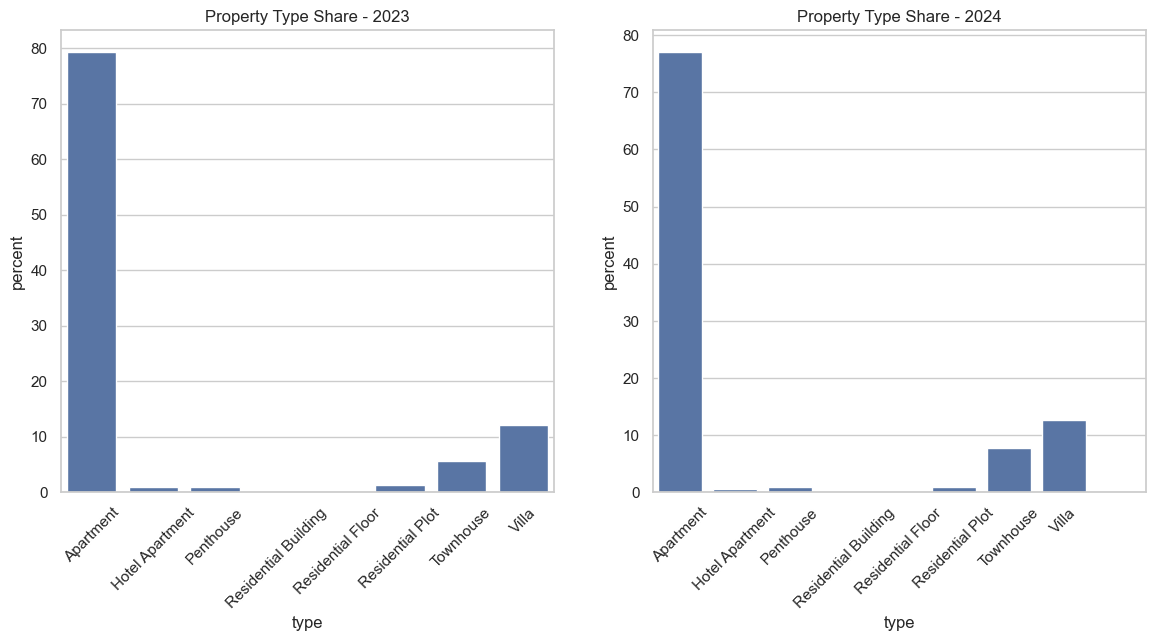

In [80]:
type_share = df.groupby(['year', 'type']).size().reset_index(name='count')
type_share['percent'] = type_share.groupby('year')['count'].transform(lambda x: x / x.sum() * 100)

# Plot for 2023 vs 2024
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=type_share[type_share['year'] == 2023], x='type', y='percent', ax=ax[0])
ax[0].set_title("Property Type Share - 2023")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(data=type_share[type_share['year'] == 2024], x='type', y='percent', ax=ax[1])
ax[1].set_title("Property Type Share - 2024")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


# Key Insights:

- The average property price remained stable from 2023 to 2024 (~4.2M AED), with a slight increase in luxury listings.
- Listings volume increased significantly in 2024, especially in high-end areas.
- Area-wise price rankings changed — with new areas entering the top 10 in 2024.
- Apartment share dropped slightly in 2024 as villa and townhome listings increased.

This comparison reveals changing demand and supply patterns in Dubai’s property market post-COVID.
